In [2]:
import pandas as pd

from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
from sqlalchemy import text
import settings
import time
import numpy as np
import pickle
import json

def db_connect():
    """
    Performs database connection using database settings from settings.py.
    Returns sqlalchemy engine instance
    """
    return create_engine(URL(**settings.DATABASE))

db = db_connect()

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
from sqlalchemy import MetaData
import numpy as np
import pandas as pd
import csv
from collections import defaultdict
import re
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.cross_validation import train_test_split
from __future__ import division
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sqlalchemy import MetaData
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
import settings
import time
import glob
import pickle

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn import preprocessing 
# import xgboost
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

In [48]:
patient_list = pd.read_csv('../TextFiles/icustay_list.csv', header = None, names = ['icustay_id'])

## Get SAPS score

In [84]:
command =  '''select * from sapsii;'''
sapsii = pd.read_sql(command, db)
sapsii_final = sapsii[sapsii.icustay_id.isin(patient_list.icustay_id)]

In [53]:
command =  '''select * from icustay_detail;'''
icustay_detail = pd.read_sql(command, db)

In [50]:
icustay_detail = icustay_detail[icustay_detail.icustay_id.isin(patient_list.icustay_id)]

#### AUC for SAPS score

In [105]:
sapsii_final = sapsii_final.merge(icustay_detail[['icustay_id','hospital_expire_flag']], on='icustay_id')
auc_sapsii = roc_auc_score(sapsii_final['hospital_expire_flag'], sapsii_final['sapsii_prob'])
print auc_sapsii

0.729764664895


#### ROC and PR Curve for SAPS score

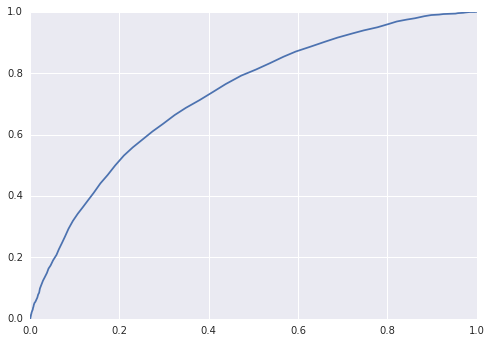

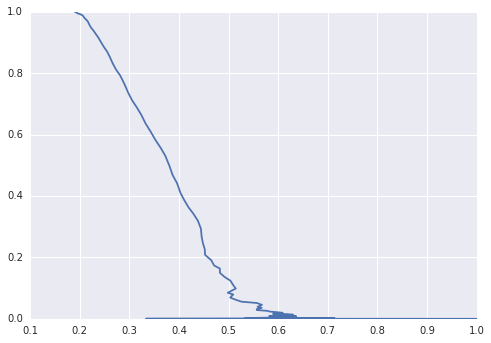

In [106]:
roc_sapsii = roc_curve(sapsii_final['hospital_expire_flag'], sapsii_final['sapsii_prob'])
pr_sapsii = precision_recall_curve(sapsii_final['hospital_expire_flag'], sapsii_final['sapsii_prob'])

plt.plot(roc_sapsii[0], roc_sapsii[1])
plt.show()
plt.plot(pr_sapsii[0], pr_sapsii[1])
plt.show()

## Get SAPS score on all pts not just >48 hours

In [97]:
icustay_detail_full = icustay_detail[icustay_detail.age>15]

In [98]:
len(icustay_detail_full)

52963

In [99]:
icustay_detail_full = icustay_detail_full[(icustay_detail_full.outtime - icustay_detail_full.intime) > "2 hours"] 

In [100]:
len(icustay_detail_full)

52837

In [102]:
sapsii_ALL = sapsii.merge(icustay_detail_full[['icustay_id','hospital_expire_flag']], on='icustay_id')
len(sapsii_ALL)

52837

In [111]:
auc_sapsii = roc_auc_score(sapsii_ALL['hospital_expire_flag'], sapsii_ALL['sapsii_prob'])
print auc_sapsii

0.802377546172


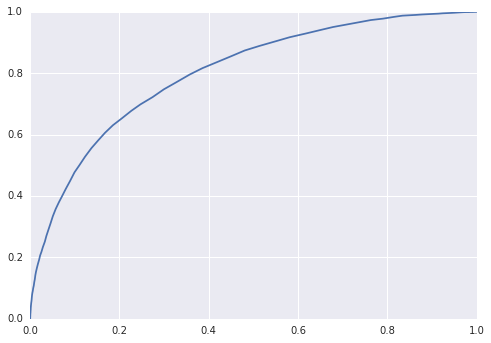

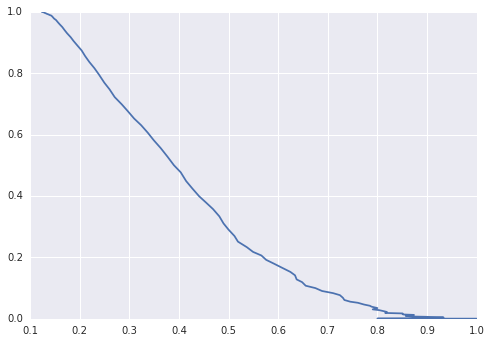

In [107]:
roc_sapsii_ALL = roc_curve(sapsii_ALL['hospital_expire_flag'], sapsii_ALL['sapsii_prob'])
pr_sapsii_ALL = precision_recall_curve(sapsii_ALL['hospital_expire_flag'], sapsii_ALL['sapsii_prob'])

plt.plot(roc_sapsii_ALL[0], roc_sapsii_ALL[1])
plt.show()
plt.plot(pr_sapsii_ALL[0], pr_sapsii_ALL[1])
plt.show()